## London Bikes Rental database

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Explore database

In [2]:
df = pd.read_csv('london_merged.csv')
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [3]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [4]:
df['timestamp']= pd.to_datetime(df['timestamp']) 
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [6]:
df.groupby(df['timestamp'].dt.year).agg({'count'})

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
,count,count,count,count,count,count,count,count,count,count
timestamp,,,,,,,,,,
2015,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643
2016,8699,8699,8699,8699,8699,8699,8699,8699,8699,8699
2017,72,72,72,72,72,72,72,72,72,72


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b4e7b38>]],
      dtype=object)

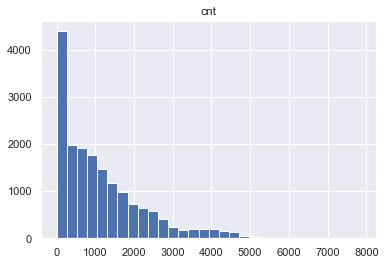

In [32]:
df.hist('cnt', bins=30)

In [8]:
df.describe(percentiles=[0.5, 0.75, 0.90, 0.99])

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
90%,2644.000000,20.000000,20.000000,88.000000,27.000000,7.000000,0.000000,1.000000,3.000000
99%,4552.740000,25.500000,25.500000,96.500000,38.000000,7.000000,1.000000,1.000000,3.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [11]:
def plotting(dataframe, title):
    sns.set(color_codes=True)
    fig = plt.figure(figsize=(14,8))
    fig.suptitle(message)
    ax1 = fig.add_subplot(2, 2, 1)
    sns.regplot(x='t1',y='cnt',data=dataframe,fit_reg=True, color="b", marker="+")
    ax1.set_xlabel('Temperature')
    ax2 = fig.add_subplot(2, 2, 2)
    sns.regplot(x='t2',y='cnt',data=dataframe,fit_reg=True, color="y", marker="+")
    ax2.set_xlabel('Feels-like temperature')
    ax3 = fig.add_subplot(2, 2, 3)
    sns.regplot(x='hum',y='cnt',data=dataframe,fit_reg=True, color="r", marker="+")
    ax3.set_xlabel('Humidity')
    ax4 = fig.add_subplot(2, 2, 4)
    sns.regplot(x='wind_speed',y='cnt',data=dataframe,fit_reg=True, color="g", marker="+")
    ax4.set_xlabel('wind-speed')

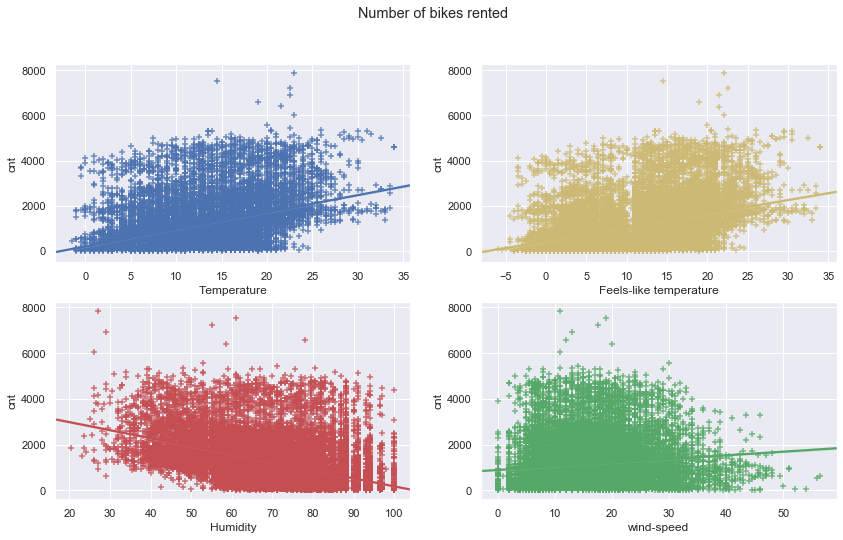

In [12]:
plotting(df, 'Number of bikes rented')

#### Exclude outliers

In [27]:
df_no_outliers = df[df.cnt < 4552]
df_no_outliers.describe(percentiles=[0.5, 0.75, 0.90, 0.99])

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000
mean,1105.084402,12.403958,11.448885,72.429332,15.921578,2.734497,0.022275,0.288300,1.494344
std,1021.392288,5.531945,6.582058,14.253162,7.906124,2.348530,0.147581,0.452984,1.122738
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,831.000000,12.000000,12.000000,75.000000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1633.500000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,3.000000
90%,2563.000000,20.000000,20.000000,88.000000,27.000000,7.000000,0.000000,1.000000,3.000000
99%,4242.620000,25.500000,25.500000,96.500000,38.000000,7.000000,1.000000,1.000000,3.000000
max,4551.000000,33.500000,33.500000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b741278>]],
      dtype=object)

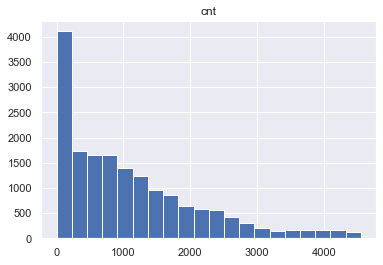

In [31]:
df_no_outliers.hist('cnt', bins=20)

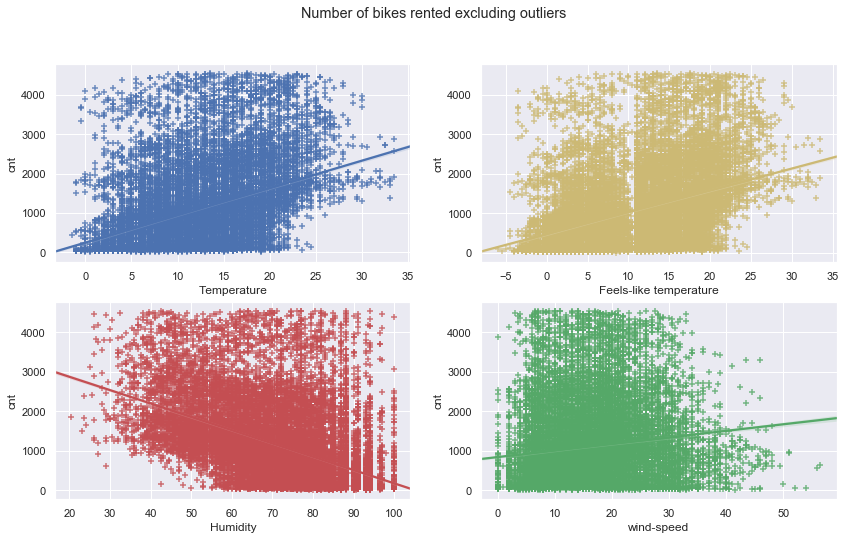

In [29]:
plotting(df_no_outliers, 'Number of bikes rented excluding outliers')

### Subsets

#### Year 2015 only

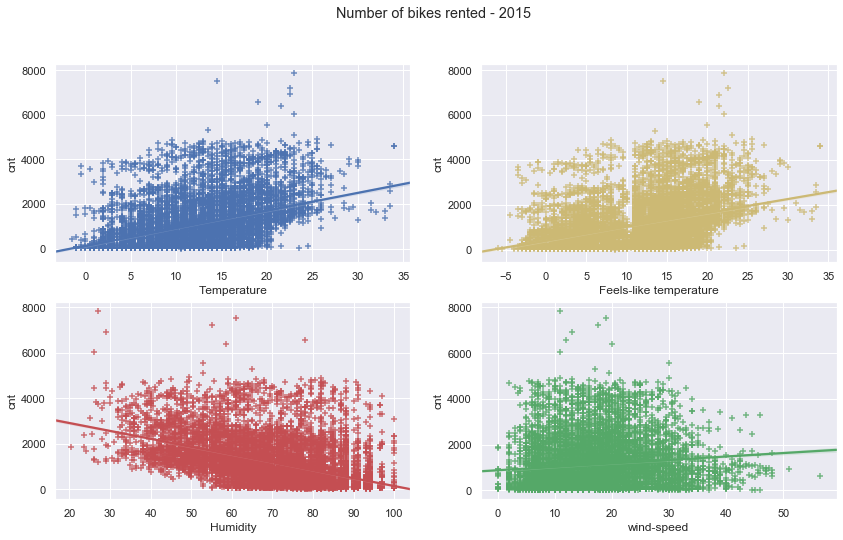

In [13]:
df1 = df[df['timestamp'].dt.year == 2015]  
plotting(df1, 'Number of bikes rented - 2015')

In [14]:
df1.describe(percentiles=[0.5, 0.75, 0.90, 0.99])

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000
mean,1126.778433,12.619981,11.742624,71.363387,16.669029,2.749393,0.019438,0.284392,1.476686
std,1063.963482,5.205448,6.258280,14.346216,8.052332,2.389691,0.138065,0.451150,1.113967
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,832.000000,13.000000,13.000000,73.000000,16.000000,2.000000,0.000000,0.000000,1.000000
75%,1636.000000,16.000000,16.000000,82.000000,21.500000,3.000000,0.000000,1.000000,2.000000
90%,2589.800000,19.000000,19.000000,88.000000,28.000000,7.000000,0.000000,1.000000,3.000000
99%,4415.900000,25.000000,24.500000,94.000000,39.000000,7.000000,1.000000,1.000000,3.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


#### Year 2016 only

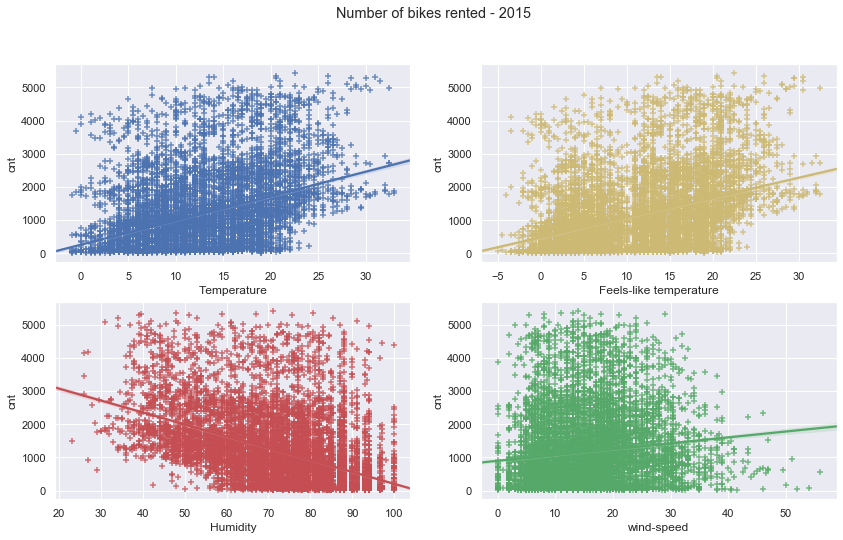

In [16]:
df2 = df[df['timestamp'].dt.year == 2016] 
plotting(df2, 'Number of bikes rented - 2015')

In [17]:
df2.describe(percentiles=[0.5, 0.75, 0.90, 0.99])

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,8699.000000,8699.000000,8699.000000,8699.000000,8699.000000,8699.000000,8699.000000,8699.00000,8699.000000
mean,1164.449477,12.381404,11.382726,73.180998,15.171648,2.691804,0.022072,0.28601,1.494884
std,1107.052494,5.886575,6.909133,14.228372,7.682953,2.278917,0.146925,0.45192,1.119987
min,9.000000,-1.000000,-5.000000,23.000000,0.000000,1.000000,0.000000,0.00000,0.000000
50%,862.000000,12.000000,12.000000,76.000000,14.000000,2.000000,0.000000,0.00000,1.000000
75%,1712.000000,17.000000,17.000000,84.000000,19.500000,3.000000,0.000000,1.00000,3.000000
90%,2688.400000,20.500000,20.500000,88.000000,26.000000,7.000000,0.000000,1.00000,3.000000
99%,4666.020000,26.500000,26.500000,97.000000,36.010000,7.000000,1.000000,1.00000,3.000000
max,5422.000000,33.000000,32.500000,100.000000,56.000000,26.000000,1.000000,1.00000,3.000000


#### Selection based on daytime (hour between 8am and 5pm) and weekend, all years

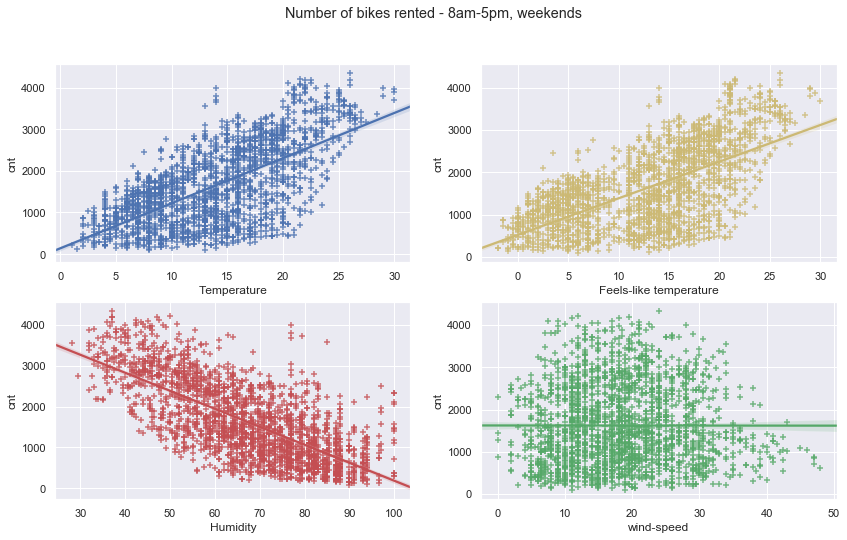

In [21]:
df_subset1 = df[(df['timestamp'].dt.hour >=8) & (df['timestamp'].dt.hour <= 17) & (df.is_weekend == 1)]
plotting(df_subset1, 'Number of bikes rented - 8am-5pm, weekends')

#### Subsection based on time 12pm - 14pm, weekend, summer

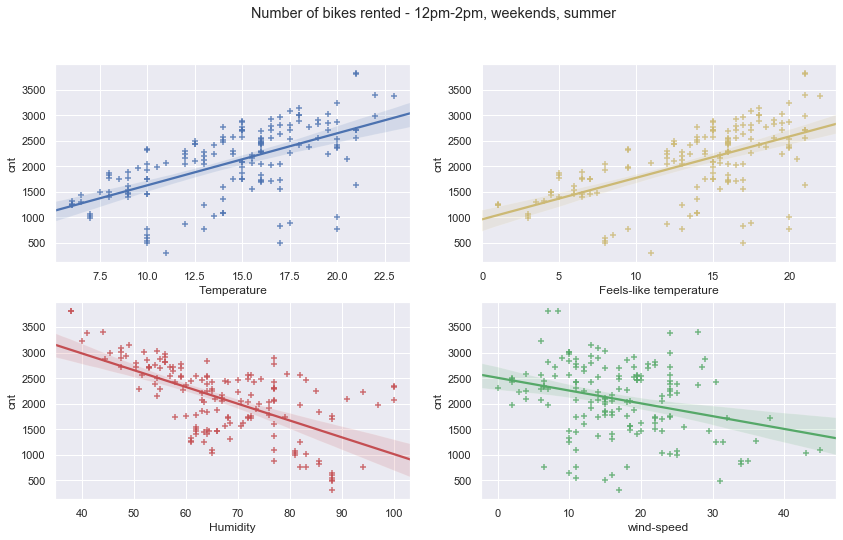

In [24]:
df_subset2 = df[(df['timestamp'].dt.hour >=12) & (df['timestamp'].dt.hour <= 14) & (df.is_weekend == 1) & (df.season == 2)]
plotting(df_subset2, 'Number of bikes rented - 12pm-2pm, weekends, summer')

#### Subsection based on time 12pm - 1pm, weekend, summer, 2015 only

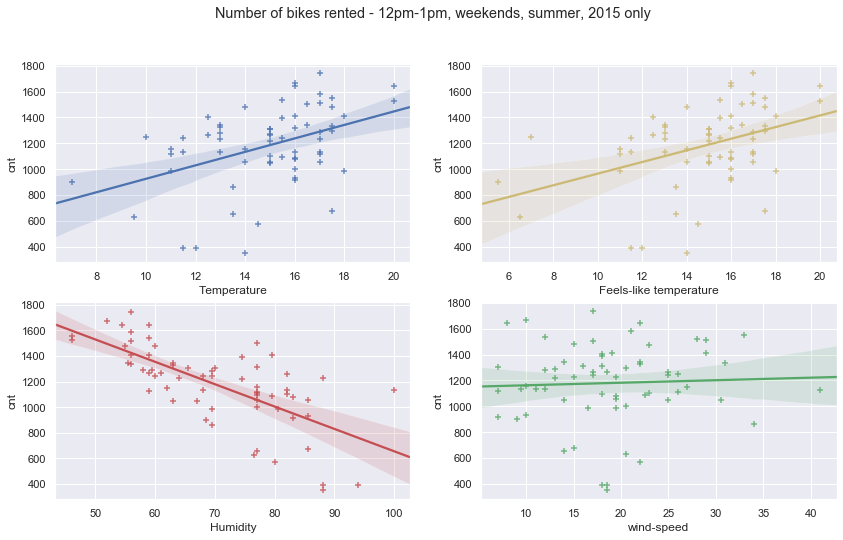

In [26]:
df_subset3 = df[(df['timestamp'].dt.hour >=12) & (df['timestamp'].dt.hour < 13) & 
                (df.is_weekend == 0) & (df.season == 2) & (df['timestamp'].dt.year == 2015)]
plotting(df_subset3, 'Number of bikes rented - 12pm-1pm, weekends, summer, 2015 only')